In [1]:
import datetime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data
rawData = pd.read_csv('https://raw.githubusercontent.com/mjwolfe91/MSDS_Capstone_JC_AN_MW/master/Data/HAR_FALL-UP_CompleteDataSet.csv')

# Extract Wrist Sensor Data (Angular/Accelerometer) from each trial for every subject
# 17 subjects * 11 activities (ADL/Falls) * 3 trials = 561 trials
# Sensors set at sampling rate of ~18.4 Hz (18-20 Hz)
raw_WristSensor = rawData[['TimeStamps','WristAccelerometer', 'Unnamed: 30', 'Unnamed: 31', 'WristAngularVelocity', 'Unnamed: 33', 'Unnamed: 34','Subject', 'Activity', 'Trial']]
# Rename Columns
raw_WristSensor.rename(columns = {'TimeStamps':'TimeStamp', 'WristAccelerometer': 'Accelerometer (x)', 'Unnamed: 30':'Accelerometer (y)','Unnamed: 31':'Accelerometer (z)', 'WristAngularVelocity': 'Angular Velocity (x)', 'Unnamed: 33':'Angular Velocity (y)','Unnamed: 34':'Angular Velocity (z)'}, inplace = True)
# Change data types
## Date Time data types
raw_WristSensor.TimeStamp = pd.to_datetime(raw_WristSensor.TimeStamp)
## Numeric data types
for col in ['Accelerometer (x)','Accelerometer (y)','Accelerometer (z)','Angular Velocity (x)','Angular Velocity (y)','Angular Velocity (z)']:
    raw_WristSensor[col] = pd.to_numeric(raw_WristSensor[1:][col])
## Categorical data types
for col in ['Subject', 'Activity', 'Trial']:
    raw_WristSensor[col] = raw_WristSensor[col].astype('category')
#raw_WristSensor.dtypes

# Magntiude of Accelerometer and Gyroscope sensors
a_mag = np.sqrt(raw_WristSensor['Accelerometer (x)']**2 + raw_WristSensor['Accelerometer (y)']**2 + raw_WristSensor['Accelerometer (z)']**2)
w_mag = np.sqrt(raw_WristSensor['Angular Velocity (x)']**2 + raw_WristSensor['Angular Velocity (y)']**2 + raw_WristSensor['Angular Velocity (z)']**2)
raw_WristSensor.insert(10, 'Acceleration Magntiude', a_mag)
raw_WristSensor.insert(11, 'Angular Velocity Magntiude', w_mag)

In [7]:
raw_WristSensor[1:].head()

,TimeStamp,Accelerometer (x),Accelerometer (y),Accelerometer (z),Angular Velocity (x),Angular Velocity (y),Angular Velocity (z),Subject,Activity,Trial,Acceleration Magntiude,Angular Velocity Magntiude
1,2018-07-04 12:04:17.738369,-1.240,-0.557,0.227,-75.854,44.024,315.915,1.0,1.0,1.0,1.378179,327.863126
2,2018-07-04 12:04:17.790509,-1.240,-0.557,0.227,-28.780,55.549,344.146,1.0,1.0,1.0,1.378179,349.786291
3,2018-07-04 12:04:17.836632,-1.884,-0.687,0.251,27.256,87.134,372.012,1.0,1.0,1.0,2.020996,383.051108
4,2018-07-04 12:04:17.885262,-1.884,-0.687,0.251,2.866,117.683,356.463,1.0,1.0,1.0,2.020996,375.397620
5,2018-07-04 12:04:17.945423,-1.597,-0.646,0.112,10.000,30.671,126.768,1.0,1.0,1.0,1.726346,130.808394


In [3]:
raw_WristSensor.dtypes

TimeStamp                     datetime64[ns]
Accelerometer (x)                    float64
Accelerometer (y)                    float64
Accelerometer (z)                    float64
Angular Velocity (x)                 float64
Angular Velocity (y)                 float64
Angular Velocity (z)                 float64
Subject                             category
Activity                            category
Trial                               category
Acceleration Magntiude               float64
Angular Velocity Magntiude           float64
dtype: object

In [4]:
def sortTrial(dict_,row_):
    if raw_WristSensor.Trial[i] == 1:
        dict_['T1'].append(row_)
    elif raw_WristSensor.Trial[i] == 2:
        dict_['T2'].append(row_)
    elif raw_WristSensor.Trial[i] == 3:
        dict_['T3'].append(row_)

def sortActivityTrial(dict_,row_):
    if raw_WristSensor.Activity[i] == 1:
        sortTrial(dict_['A1'],row_)
        #dict_['A1'].append(row_)
    elif raw_WristSensor.Activity[i] == 2:
        sortTrial(dict_['A2'],row_)
        #dict_['A2'].append(row_)
    elif raw_WristSensor.Activity[i] == 3:
        sortTrial(dict_['A3'],row_)
        #dict_['A3'].append(row_)
    elif raw_WristSensor.Activity[i] == 4:
        sortTrial(dict_['A4'],row_)
        #dict_['A4'].append(row_)
    elif raw_WristSensor.Activity[i] == 5:
        sortTrial(dict_['A5'],row_)
        #dict_['A5'].append(row_)
    elif raw_WristSensor.Activity[i] == 6:
        sortTrial(dict_['A6'],row_)
        #dict_['A6'].append(row_)
    elif raw_WristSensor.Activity[i] == 7:
        sortTrial(dict_['A7'],row_)
        #dict_['A7'].append(row_)
    elif raw_WristSensor.Activity[i] == 8:
        sortTrial(dict_['A8'],row_)
        #dict_['A8'].append(row_)
    elif raw_WristSensor.Activity[i] == 9:
        sortTrial(dict_['A9'],row_)
        #dict_['A9'].append(row_)
    elif raw_WristSensor.Activity[i] == 10:
        sortTrial(dict_['A10'],row_)
        #dict_['A10'].append(row_)
    elif raw_WristSensor.Activity[i] == 11:
        sortTrial(dict_['A11'],row_)
        #dict_['A11'].append(row_)

In [5]:
# Aggregate Wrist Sensor data by Subjects
WristS_Subjects = {}

for s in np.unique(raw_WristSensor.Subject[1:]):
    WristS_Subjects["S{0}".format(int(s))] = {"A1":{"T1":[],"T2":[],"T3":[]},"A2":{"T1":[],"T2":[],"T3":[]},"A3":{"T1":[],"T2":[],"T3":[]},"A4":{"T1":[],"T2":[],"T3":[]},"A5":{"T1":[],"T2":[],"T3":[]}, "A6":{"T1":[],"T2":[],"T3":[]},
                                              "A7":{"T1":[],"T2":[],"T3":[]},"A8":{"T1":[],"T2":[],"T3":[]},"A9":{"T1":[],"T2":[],"T3":[]},"A10":{"T1":[],"T2":[],"T3":[]},"A11":{"T1":[],"T2":[],"T3":[]}}


for i, row in raw_WristSensor[1:].iterrows():
    if raw_WristSensor.Subject[i] == 1:
        sortActivityTrial(WristS_Subjects['S1'],row)
    elif raw_WristSensor.Subject[i] == 2:
        sortActivityTrial(WristS_Subjects['S2'],row)
    elif raw_WristSensor.Subject[i] == 3:
        sortActivityTrial(WristS_Subjects['S3'],row)
    elif raw_WristSensor.Subject[i] == 4:
        sortActivityTrial(WristS_Subjects['S4'],row)
    elif raw_WristSensor.Subject[i] == 5:
        sortActivityTrial(WristS_Subjects['S5'],row)
    elif raw_WristSensor.Subject[i] == 6:
        sortActivityTrial(WristS_Subjects['S6'],row)
    elif raw_WristSensor.Subject[i] == 7:
        sortActivityTrial(WristS_Subjects['S7'],row)
    elif raw_WristSensor.Subject[i] == 8:
        sortActivityTrial(WristS_Subjects['S8'],row)
    elif raw_WristSensor.Subject[i] == 9:
        sortActivityTrial(WristS_Subjects['S9'],row)
    elif raw_WristSensor.Subject[i] == 10:
        sortActivityTrial(WristS_Subjects['S10'],row)
    elif raw_WristSensor.Subject[i] == 11:
        sortActivityTrial(WristS_Subjects['S11'],row)
    elif raw_WristSensor.Subject[i] == 12:
        sortActivityTrial(WristS_Subjects['S12'],row)
    elif raw_WristSensor.Subject[i] == 13:
        sortActivityTrial(WristS_Subjects['S13'],row)
    elif raw_WristSensor.Subject[i] == 14:
        sortActivityTrial(WristS_Subjects['S14'],row)
    elif raw_WristSensor.Subject[i] == 15:
        sortActivityTrial(WristS_Subjects['S15'],row)
    elif raw_WristSensor.Subject[i] == 16:
        sortActivityTrial(WristS_Subjects['S16'],row)
    elif raw_WristSensor.Subject[i] == 17:
        sortActivityTrial(WristS_Subjects['S17'],row)

# Change lists to numpy array
# Column idx of numpy array [0:Timestamp, 1: Accelerometer (x), 2: Accelerometer (y), 3: Accelerometer (z),
#                                         4: Angular Velocity (x), 5 Angular Velocity (y), 6: Angular Velocity (z)
#                                         7: Subject, 8: Activity, 9: Trial, 10: Acceleration Magntiude, 11: Angular Velcoity Magntiude]
for subject in WristS_Subjects.keys():
    for activity in WristS_Subjects[subject].keys():
        for trial in WristS_Subjects[subject][activity].keys():
            WristS_Subjects[subject][activity][trial] = np.array(WristS_Subjects[subject][activity][trial])
            WristS_Subjects[subject][activity][trial] = np.reshape(WristS_Subjects[subject][activity][trial], (-1,12))
            

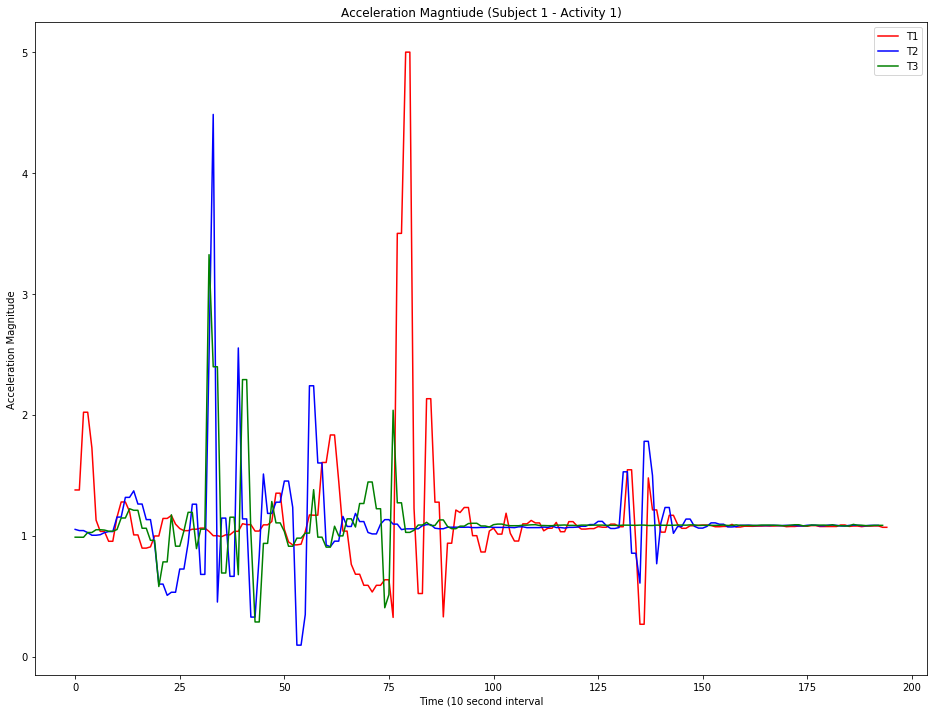

In [12]:
S1A1_T1 = WristS_Subjects['S1']['A1']['T1'][:,10]
S1A1_T2 = WristS_Subjects['S1']['A1']['T2'][:,10]
S1A1_T3 = WristS_Subjects['S1']['A1']['T3'][:,10]

plt.figure(figsize=(16,12))
plt.title('Acceleration Magntiude (Subject 1 - Activity 1)')
plt.xlabel('Time (10 second interval')
plt.ylabel('Acceleration Magnitude')
plt.plot(S1A1_T1,'r', S1A1_T2,'b',S1A1_T3,'g')
plt.gca().legend(('T1','T2','T3'))

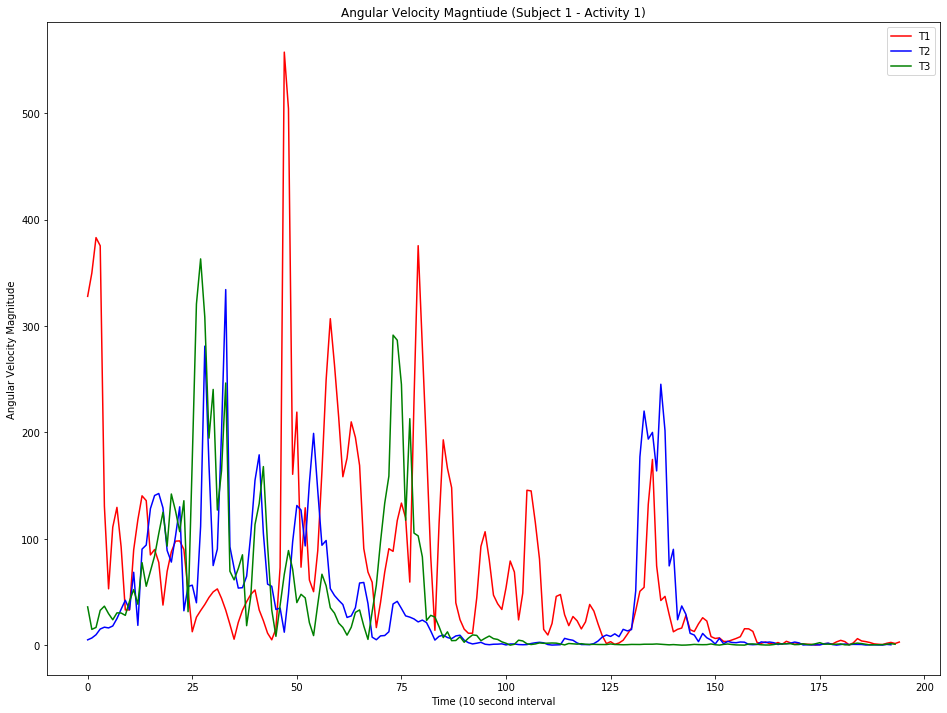

In [13]:
S1A1_T1 = WristS_Subjects['S1']['A1']['T1'][:,11]
S1A1_T2 = WristS_Subjects['S1']['A1']['T2'][:,11]
S1A1_T3 = WristS_Subjects['S1']['A1']['T3'][:,11]

plt.figure(figsize=(16,12))
plt.title('Angular Velocity Magntiude (Subject 1 - Activity 1)')
plt.xlabel('Time (10 second interval')
plt.ylabel('Angular Velocity Magnitude')
plt.plot(S1A1_T1,'r', S1A1_T2,'b',S1A1_T3,'g')
plt.gca().legend(('T1','T2','T3'))

In [52]:
AVC = []
WVC = []
for subject in WristS_Subjects.keys():
    for activity in WristS_Subjects[subject].keys():
        for trial in WristS_Subjects[subject][activity].keys():
            # Subject 8 is missing data for Trials 2/3 of Activity 11
            if (subject == "S8") & (activity == "A11") & (trial in ["T2","T3"]):
                continue
            else:
                if activity == 'A10':
                    interval = 30
                elif activity in ['A6','A7','A8','A11']: 
                    interval = 60
                else:
                    interval = 10
                AVC.append(np.sum(np.diff(WristS_Subjects[subject][activity][trial][:,10], n=interval))/10)
                WVC.append(np.sum(np.diff(WristS_Subjects[subject][activity][trial][:,11], n=interval))/10)

In [106]:
from statistics import mean

cluster_thresholds = pd.DataFrame(columns = ["Subject","Activity","Trial","AVC","WVC"])
# Column idx of dataframe [0:Subject, 1: Activity, 2: Trial, 3: Max Acceleration Magnitude, 4: Max Angular Velocity Magnitude]

for subject in WristS_Subjects.keys():
    for activity in WristS_Subjects[subject].keys():
        for trial in WristS_Subjects[subject][activity].keys():
            # Subject 8 is missing data for Trials 2/3 of Activity 11
            if (subject == "S8") & (activity == "A11") & (trial in ["T2","T3"]):
                continue
            else:
                if activity == 'A10':
                    interval = 30
                elif activity in ['A6','A7','A8','A11']: 
                    interval = 60
                else:
                    interval = 10
                AVC = np.sum(np.diff(WristS_Subjects[subject][activity][trial][:,10], n=1))/interval
                WVC = np.sum(np.diff(WristS_Subjects[subject][activity][trial][:,11], n=1))/interval
                s = mean(WristS_Subjects[subject][activity][trial][:,7])
                a = mean(WristS_Subjects[subject][activity][trial][:,8])
                t = mean(WristS_Subjects[subject][activity][trial][:,9])
                cluster_thresholds = cluster_thresholds.append({"Subject":s, "Activity":a, "Trial":t, "AVC":AVC, "WVC":WVC}, ignore_index=True)

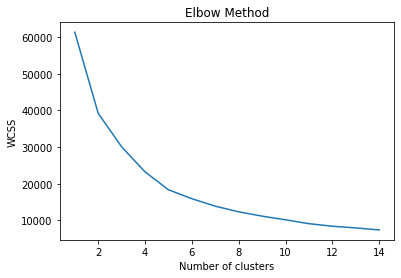

In [107]:
from sklearn.cluster import KMeans

X = cluster_thresholds.iloc[:,0:5]
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

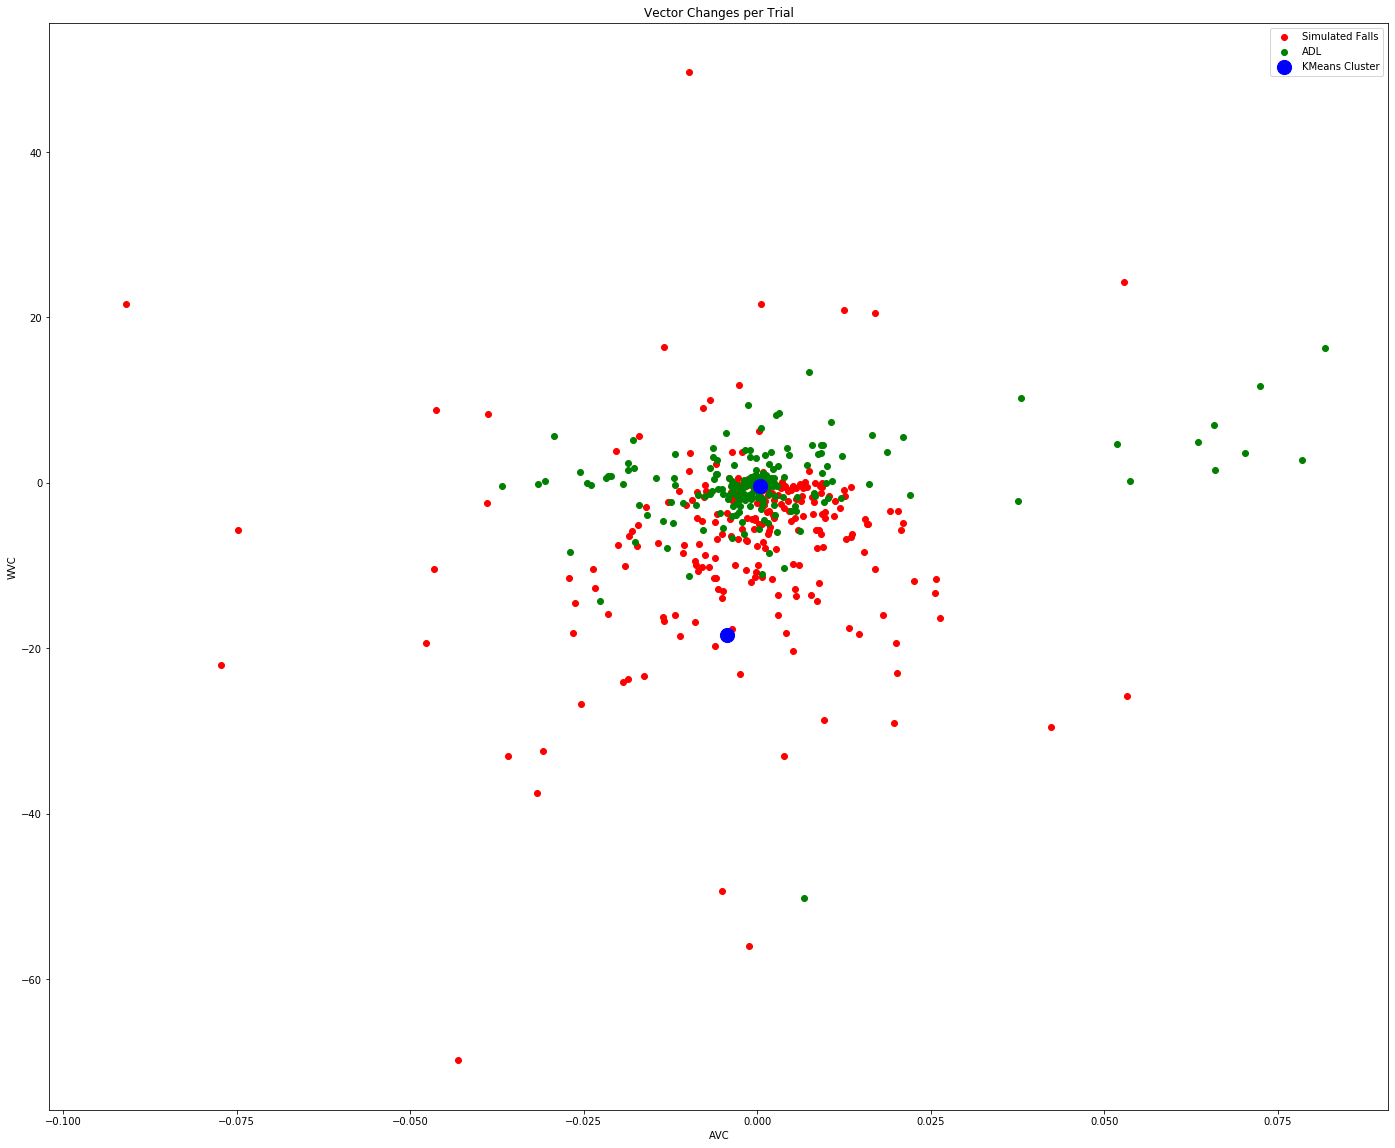

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

estimators = [('clustering', KMeans()), ('svc', SVC())]
pipe = Pipeline(estimators)

pipe.set_params(clustering__n_clusters=2,clustering__init='k-means++',clustering__max_iter=300,
               clustering__n_init=10,clustering__random_state=0)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
fig=plt.figure(figsize = (24,20))
plt.scatter(x=X.iloc[:,3][X['Activity']<6], y=X.iloc[:,4][X['Activity']<6], c="red", label='Simulated Falls')
plt.scatter(x=X.iloc[:,3][X['Activity']>5], y=X.iloc[:,4][X['Activity']>5], c="green", label="ADL")
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 4], s=200, c='blue', label="KMeans Cluster")
plt.title("Vector Changes per Trial")
plt.xlabel("AVC")
plt.ylabel("WVC")
plt.legend()
plt.show()

In [109]:
kmeans.cluster_centers_

array([[ 8.53846154e+00,  3.69230769e+00,  1.97435897e+00,
        -4.40003606e-03, -1.83393257e+01],
       [ 9.07900208e+00,  6.35343035e+00,  2.00207900e+00,
         4.33669838e-04, -3.91463609e-01]])

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y = cluster_thresholds['Activity'].to_numpy()
y = np.where(y < 6, 1, 0)
distances = np.column_stack([np.sum((X - center)**2, axis=1)**0.5 for center in kmeans.cluster_centers_])
X_train, X_test, y_train, y_test = train_test_split(distances, y, test_size=0.33, random_state=123)
svc = SVC(kernel='linear', C=10, gamma=100) 
svc.fit(X_train, y_train)
preds = svc.predict(X_test)

print(accuracy_score(y_test, preds))

0.7675675675675676


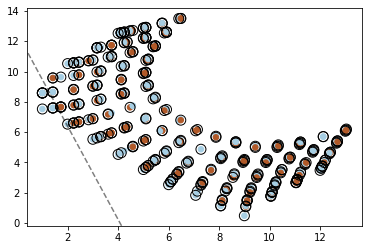

In [104]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()